## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
tf.__version__

'2.4.1'

In [3]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [4]:
#Check number of training examples and size of each example
x_train.shape

(60000, 28, 28)

In [5]:
#Check number of test examples and size of each example
x_test.shape

(10000, 28, 28)

### Find dimensions of an image in the dataset

In [6]:
x_train[0].shape

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [7]:
y_train = tf.keras.utils.to_categorical(y_train)

In [8]:
y_test = tf.keras.utils.to_categorical(y_test)

In [9]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Normalize both the train and test image data from 0-255 to 0-1

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [11]:
x_train /= 255
x_test /= 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [12]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

### Import the necessary layers from keras to build the model

In [13]:
#using tf alias for tensorflow

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [14]:
#Clear any existing model in memory
tf.keras.backend.clear_session()

#Initialize model
model = tf.keras.models.Sequential()

#Adding first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu',
                                 input_shape=(28,28,1)))

#Adding second convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu', padding='same'))

#Flatten the output
model.add(tf.keras.layers.Flatten())

#Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5,verbose=1, mode='auto')
callback_list = [early_stopping]

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 21632)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2769024   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 2,779,882
Trainable params: 2,779,882
Non-trainable params: 0
_________________________________________________________________


In [16]:
#Train the model
model.fit(x_train,y_train,          
          validation_data=(x_test,y_test),
          epochs=10,
          batch_size=500, callbacks = callback_list)

Epoch 1/10
120/120 [==============================] - 4s 19ms/step - loss: 0.8430 - accuracy: 0.7224 - val_loss: 0.4116 - val_accuracy: 0.8548
Epoch 2/10
120/120 [==============================] - 2s 16ms/step - loss: 0.3452 - accuracy: 0.8772 - val_loss: 0.3245 - val_accuracy: 0.8850
Epoch 3/10
120/120 [==============================] - 2s 16ms/step - loss: 0.2713 - accuracy: 0.9012 - val_loss: 0.2973 - val_accuracy: 0.8914
Epoch 4/10
120/120 [==============================] - 2s 16ms/step - loss: 0.2360 - accuracy: 0.9164 - val_loss: 0.2729 - val_accuracy: 0.9021
Epoch 5/10
120/120 [==============================] - 2s 16ms/step - loss: 0.2060 - accuracy: 0.9262 - val_loss: 0.2616 - val_accuracy: 0.9080
Epoch 6/10
120/120 [==============================] - 2s 16ms/step - loss: 0.1708 - accuracy: 0.9380 - val_loss: 0.2690 - val_accuracy: 0.9031
Epoch 7/10
120/120 [==============================] - 2s 16ms/step - loss: 0.1573 - accuracy: 0.9428 - val_loss: 0.2628 - val_accuracy: 0.9083

## Inference:- This model is overfit.

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [17]:
#Clear any existing model in memory
tf.keras.backend.clear_session()

#Initialize model
model = tf.keras.models.Sequential()

#Adding first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu',
                                 input_shape=(28,28,1)))

#Adding second convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu', padding='same'))
#Add MaxPooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Flatten the output
model.add(tf.keras.layers.Flatten())

#Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Add another dropout layer
model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5,verbose=1, mode='auto')
callback_list = [early_stopping]

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [19]:
#Train the model
model.fit(x_train,y_train,          
          validation_data=(x_test,y_test),
          epochs=10,
          batch_size=500, callbacks = callback_list)

Epoch 1/10
120/120 [==============================] - 2s 15ms/step - loss: 0.9688 - accuracy: 0.6707 - val_loss: 0.4114 - val_accuracy: 0.8510
Epoch 2/10
120/120 [==============================] - 2s 14ms/step - loss: 0.3918 - accuracy: 0.8614 - val_loss: 0.3450 - val_accuracy: 0.8733
Epoch 3/10
120/120 [==============================] - 2s 14ms/step - loss: 0.3272 - accuracy: 0.8831 - val_loss: 0.3035 - val_accuracy: 0.8898
Epoch 4/10
120/120 [==============================] - 2s 14ms/step - loss: 0.2829 - accuracy: 0.8967 - val_loss: 0.2884 - val_accuracy: 0.8939
Epoch 5/10
120/120 [==============================] - 2s 14ms/step - loss: 0.2567 - accuracy: 0.9071 - val_loss: 0.2595 - val_accuracy: 0.9068
Epoch 6/10
120/120 [==============================] - 2s 14ms/step - loss: 0.2314 - accuracy: 0.9159 - val_loss: 0.2567 - val_accuracy: 0.9080
Epoch 7/10
120/120 [==============================] - 2s 14ms/step - loss: 0.2107 - accuracy: 0.9238 - val_loss: 0.2487 - val_accuracy: 0.9085

## Inferenc:- This model is overfit but better than the previous built model.

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [20]:
#ImageDataGenerator declaration 
datagen = tf.keras.preprocessing.image.ImageDataGenerator(featurewise_center=False,  # set input mean to 0 over the dataset
                                                               samplewise_center=False,  # set each sample mean to 0
                                                               featurewise_std_normalization=False,  # divide inputs by std of the dataset
                                                               samplewise_std_normalization=False,  # divide each input by its std
                                                               zca_whitening=False,  # apply ZCA whitening
                                                               rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
                                                               width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                                                               height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                                                               horizontal_flip=False,  # randomly flip images
                                                               vertical_flip=False)  # randomly flip images)

# Prepare the generator
datagen.fit(x_train)

In [21]:
#Clear any existing model in memory
tf.keras.backend.clear_session()

#Initialize model
model = tf.keras.models.Sequential()

#Adding first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu',
                                 input_shape=(28,28,1)))

#Adding second convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu', padding='same'))
#Add MaxPooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Flatten the output
model.add(tf.keras.layers.Flatten())

#Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Add another dropout layer
model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5,verbose=1, mode='auto')
callback_list = [early_stopping]

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [23]:
#Train the model
model.fit_generator(datagen.flow(x_train,y_train,batch_size=32),
                    steps_per_epoch=x_train.shape[0]/32,
                    epochs=10,
                    validation_data=(x_test,y_test),
                    callbacks = callback_list)

Epoch 1/10


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


1875/1875 [==============================] - 18s 10ms/step - loss: 1.0361 - accuracy: 0.6158 - val_loss: 0.5625 - val_accuracy: 0.7817
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.6463 - accuracy: 0.7574 - val_loss: 0.5062 - val_accuracy: 0.8170
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.5725 - accuracy: 0.7869 - val_loss: 0.4656 - val_accuracy: 0.8273
Epoch 4/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.5149 - accuracy: 0.8062 - val_loss: 0.4211 - val_accuracy: 0.8451
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4895 - accuracy: 0.8182 - val_loss: 0.4013 - val_accuracy: 0.8569
Epoch 6/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4659 - accuracy: 0.8256 - val_loss: 0.4008 - val_accuracy: 0.8589
Epoch 7/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4450 - accuracy: 0.8339 - val_loss: 0.4162 - val_accuracy: 0

##Inference:- This model is underfit.

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

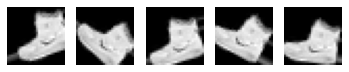

In [24]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [25]:
#Clear any existing model in memory
tf.keras.backend.clear_session()

#Initialize model
model = tf.keras.models.Sequential()

#Adding first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu',
                                 input_shape=(28,28,1)))

#Add MaxPooling layer 1
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Adding second convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu', padding='same'))

#Add MaxPooling layer 2
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Add dropout layer
model.add(tf.keras.layers.Dropout(0.25))

#Flatten the output
model.add(tf.keras.layers.Flatten())

#Dense layer 1
model.add(tf.keras.layers.Dense(256, activation='relu'))

#Dense layer 2
model.add(tf.keras.layers.Dense(512, activation='relu'))

#Dense layer 3
model.add(tf.keras.layers.Dense(1024, activation='relu'))

#Add anoter dropout layer
model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5,verbose=1, mode='auto')
callback_list = [early_stopping]

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2

In [27]:
#Train the model
model.fit_generator(datagen.flow(x_train,y_train,batch_size=64),
                    steps_per_epoch=x_train.shape[0]/64,
                    epochs=20,
                    validation_data=(x_test,y_test),
                    callbacks = callback_list)

Epoch 1/20


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


937/937 [==============================] - 15s 16ms/step - loss: 1.0588 - accuracy: 0.5947 - val_loss: 0.6113 - val_accuracy: 0.7558
Epoch 2/20
937/937 [==============================] - 15s 16ms/step - loss: 0.6140 - accuracy: 0.7620 - val_loss: 0.4589 - val_accuracy: 0.8232
Epoch 3/20
937/937 [==============================] - 15s 16ms/step - loss: 0.5418 - accuracy: 0.7936 - val_loss: 0.4718 - val_accuracy: 0.8307
Epoch 4/20
937/937 [==============================] - 15s 16ms/step - loss: 0.4963 - accuracy: 0.8098 - val_loss: 0.4073 - val_accuracy: 0.8507
Epoch 5/20
937/937 [==============================] - 15s 16ms/step - loss: 0.4703 - accuracy: 0.8219 - val_loss: 0.3958 - val_accuracy: 0.8562
Epoch 6/20
937/937 [==============================] - 15s 16ms/step - loss: 0.4461 - accuracy: 0.8307 - val_loss: 0.3907 - val_accuracy: 0.8566
Epoch 7/20
937/937 [==============================] - 15s 16ms/step - loss: 0.4342 - accuracy: 0.8363 - val_loss: 0.3764 - val_accuracy: 0.8599
Epo

## Inference:-This model is neither underfit nor overfit. Its just about right. But the accuracy is not that high. It can be improved with further tuning and transfer learning.

###  Report the final train and validation accuracy

In [28]:
print("Train accuracy:", model.evaluate(x_train,y_train)[1])

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3120 - accuracy: 0.8809
Train accuracy: 0.8808500170707703


In [29]:
print("Test accuracy:", model.evaluate(x_test,y_test)[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.3523 - accuracy: 0.8678
Test accuracy: 0.8677999973297119


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [30]:
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [31]:
(x_train_c, y_train_c), (x_test_c, y_test_c) = cifar10.load_data()

In [32]:
x_train_c.shape

(50000, 32, 32, 3)

In [33]:
x_test_c.shape

(10000, 32, 32, 3)

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [34]:
#ImageDataGenerator declaration 
datagen_c = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
                                                          width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                                                          height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                                                          horizontal_flip=True,  # randomly flip images
                                                          vertical_flip=False)  # randomly flip images)

In [35]:
x_train_c = x_train_c.astype('float32')
x_test_c = x_test_c.astype('float32')

#Normalization 
x_train_c /=255
x_test_c /=255

#Reshaping the images
x_train_c = x_train_c.reshape(x_train_c.shape[0],32,32,3)
x_test_c = x_test_c.reshape(x_test_c.shape[0],32,32,3)

### **Prepare/fit the generator.**

In [36]:
# Prepare the generator
datagen_c.fit(x_train_c)                                                          

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

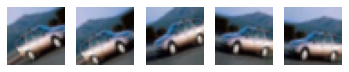

In [37]:
from matplotlib import pyplot as plt
gen = datagen_c.flow(x_train_c[4:5], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()